Importing Libraries

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

Importing Dataset

In [53]:
dataset_bank = pd.read_csv('../bank-data/bank-full.csv', delimiter=';', quotechar='"')
dataset_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Finding the columns with categorical data

In [54]:
categorical_columns = dataset_bank.dtypes[dataset_bank.dtypes == 'object']

In [66]:
categorical_columns

job          object
marital      object
education    object
default      object
housing      object
loan         object
contact      object
month        object
poutcome     object
y            object
dtype: object

Encoding Categorical data

In [55]:
from sklearn.calibration import LabelEncoder

label_encoder = LabelEncoder()
for column in categorical_columns.index:
    dataset_bank[column] = label_encoder.fit_transform(dataset_bank[column])

In [56]:
dataset_bank_encoded = pd.get_dummies(dataset_bank, columns=categorical_columns.index, drop_first=True)

In [64]:
dataset_bank_encoded.describe()

,age,balance,day,duration,campaign,pdays,previous,job_1,job_2,job_3,...,month_6,month_7,month_8,month_9,month_10,month_11,poutcome_1,poutcome_2,poutcome_3,y_1
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.215257,0.032890,0.027427,...,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.040698,0.033421,0.817478,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.411005,0.178351,0.163326,...,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.197592,0.179735,0.386278,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Extracting Feature and labels from encoded data

In [57]:
X = dataset_bank_encoded.iloc[:, :-1]
y = dataset_bank_encoded.iloc[:, -1]

Splitting the dataset into Test and Training dataset

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

Feature Scaling with standardization

In [59]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
X_train_scaled

array([[-0.56107306,  0.45743247, -0.33861866, ..., -0.20550606,
        -0.18685923,  0.46971725],
       [-1.03190399, -0.3034566 , -0.45860153, ..., -0.20550606,
        -0.18685923,  0.46971725],
       [-0.18440832,  0.94907372, -1.05851592, ..., -0.20550606,
        -0.18685923,  0.46971725],
       ...,
       [-0.84357162, -0.34668144, -1.05851592, ..., -0.20550606,
        -0.18685923,  0.46971725],
       [ 1.51058302, -0.37538801, -0.0986529 , ..., -0.20550606,
        -0.18685923, -2.12894035],
       [ 1.32225065, -0.38231718, -0.57858441, ..., -0.20550606,
        -0.18685923,  0.46971725]])

Confusion Matrix:
 [[8506 1488]
 [ 232 1077]]


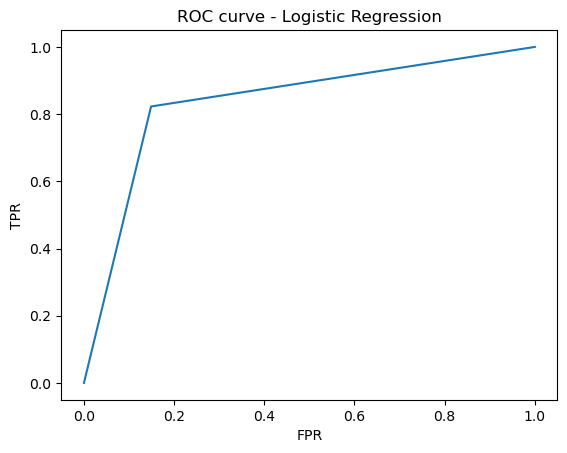

In [60]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)


# Fitting data to model

from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(random_state=42, max_iter=10000)
logistic_regression_model.fit(X_train_resampled, y_train_resampled)

logistic_regression_predictions = logistic_regression_model.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, mean_squared_error, accuracy_score

logistic_regression_auc = roc_auc_score(y_test, logistic_regression_predictions)
logistic_regression_fpr, logistic_regression_tpr, _ = roc_curve(y_test, logistic_regression_predictions)

conf_matrix = confusion_matrix(y_test, logistic_regression_predictions)
print("Confusion Matrix:\n", conf_matrix)


plt.plot(logistic_regression_fpr, logistic_regression_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve - Logistic Regression')
plt.show()
     

In [61]:
print("ROC AUC score : ",roc_auc_score(y_test, logistic_regression_predictions))

ROC AUC score :  0.8369380681120666


In [62]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, logistic_regression_predictions)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, logistic_regression_predictions))

Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      9994
           1       0.42      0.82      0.56      1309

    accuracy                           0.85     11303
   macro avg       0.70      0.84      0.73     11303
weighted avg       0.91      0.85      0.87     11303

